In [3]:
import torch
import pyro

from sbi.utils.pyroutils import get_transforms

In [4]:
prior_dim = 10
prior_params = {
    "low": -1.0 * torch.ones((prior_dim,)),
    "high": +1.0 * torch.ones((prior_dim,)),
}
prior_dist = pyro.distributions.Uniform(**prior_params).to_event(1)

def prior(num_samples=1):
    return pyro.sample("theta", prior_dist.expand_by([num_samples]))

transforms = get_transforms(prior)

to_unbounded = transforms["theta"]
to_bounded = transforms["theta"].inv

assert to_unbounded(prior(1000)).max() > 1.0
assert to_bounded(to_unbounded(prior(1000))).max() < 1.0

In [7]:
transforms

{'theta': ComposeTransform(
     _InverseTransform(),
     _InverseTransform()
 )}

In [11]:
print(transforms)

{'theta': ComposeTransform(
    _InverseTransform(),
    _InverseTransform()
)}


In [57]:
from torch.distributions import Exponential, Normal, Uniform
from torch.distributions import biject_to
import matplotlib.pyplot as plt

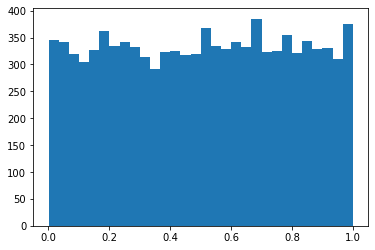

In [91]:
unif_dist = Uniform(0.0, 1.0)
constrained = torch.rand(10000, requires_grad=True)

_ = plt.hist(constrained.detach().numpy(), bins=30)

In [98]:
my_bijection = biject_to(dist.support)

sample = my_bijection.inv(constrained)

potential_energy = -unif_dist.log_prob(my_bijection(sample))

In [99]:
potential_energy

tensor([-0., -0., -0.,  ..., -0., -0., -0.])

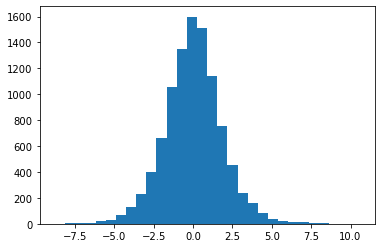

In [94]:
_ = plt.hist(sample.detach().numpy(), bins=30)

In [62]:
dist2 = Normal(torch.zeros(1), torch.ones(1))

In [63]:
dist2.log_prob(unconstrained[0])

tensor([-0.9405], grad_fn=<SubBackward0>)

In [64]:
dist.log_prob(sample[0])

tensor(0.)

In [70]:
biject_to(dist.support).log_abs_det_jacobian

<bound method ComposeTransform.log_abs_det_jacobian of ComposeTransform(
    SigmoidTransform(),
    AffineTransform()
)>